### Chuan Ping,  Urval Patel, Dr. Roche, Dr. Potoyan

In [58]:
import numpy as np
import matplotlib.pyplot as plt

import mdtraj as md
import MDAnalysis as mda

#from contact_map import ContactFrequency, ContactDifference
import nglview as nv
import ipywidgets


from idptools.idptools import IDPAnalysis
from idptools.contact_maps import *
from idptools.plot_utils import *
from idptools.dim_red import *

%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2
plt.style.use('bmh')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
bzip_traj = md.load('./ATF-bzip/bzip1_600ns.pdb')
atf_traj  = md.load('./ATF-full/atf_short.h5')
tad_traj  = md.load('./ATF-tad/tad_50frames.h5')

In [60]:
nv.show_mdtraj(tad_traj)

NGLWidget(max_frame=1500)

In [76]:
bzip = IDPAnalysis(traj=bzip_traj, sel="name CA", stride=1)

bzip.compute_contacts(sel1="name CA", 
                      sel2="name CA", 
                      cut=0.7,
                      n_neighbors_ignored=1)

bzip.compute_dpca(n_pcs=5)

bzip.compute_cpca(n_pcs=5)

In [77]:
bzip.viz_contacts()

In [85]:
bzip_traj.n_frames

1201

In [79]:
print(bzip.dists.shape)  #frames, features

print(bzip.dist_V.shape) # reduced features, frames

print(bzip.dist_proj.shape) # projection of features

(1201, 5776)
(5, 5776)
(1201, 5)


(array([ 13.,  59.,  88., 212., 365., 296., 107.,  40.,  13.,   8.]),
 array([-18.648207 , -14.57667  , -10.505133 ,  -6.4335957,  -2.3620586,
          1.7094784,   5.7810154,   9.852552 ,  13.924089 ,  17.995626 ,
         22.067163 ], dtype=float32),
 <BarContainer object of 10 artists>)

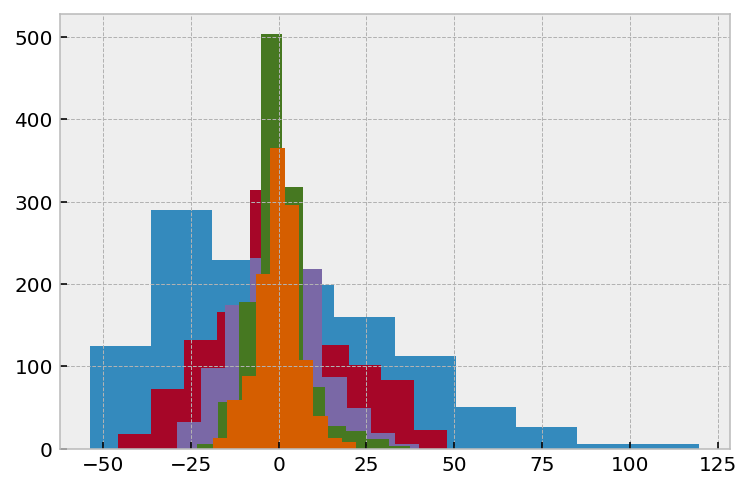

In [94]:
plt.hist(bzip.dist_proj[:,0])
plt.hist(bzip.dist_proj[:,1])
plt.hist(bzip.dist_proj[:,2])
plt.hist(bzip.dist_proj[:,3])
plt.hist(bzip.dist_proj[:,4])

In [39]:
bzip_vmap = eig_map(bzip.dis_V, bzip.ctmap, k=0)

ctmap_viz(bzip_vmap, bzip_names, title = "Eigenvector values")

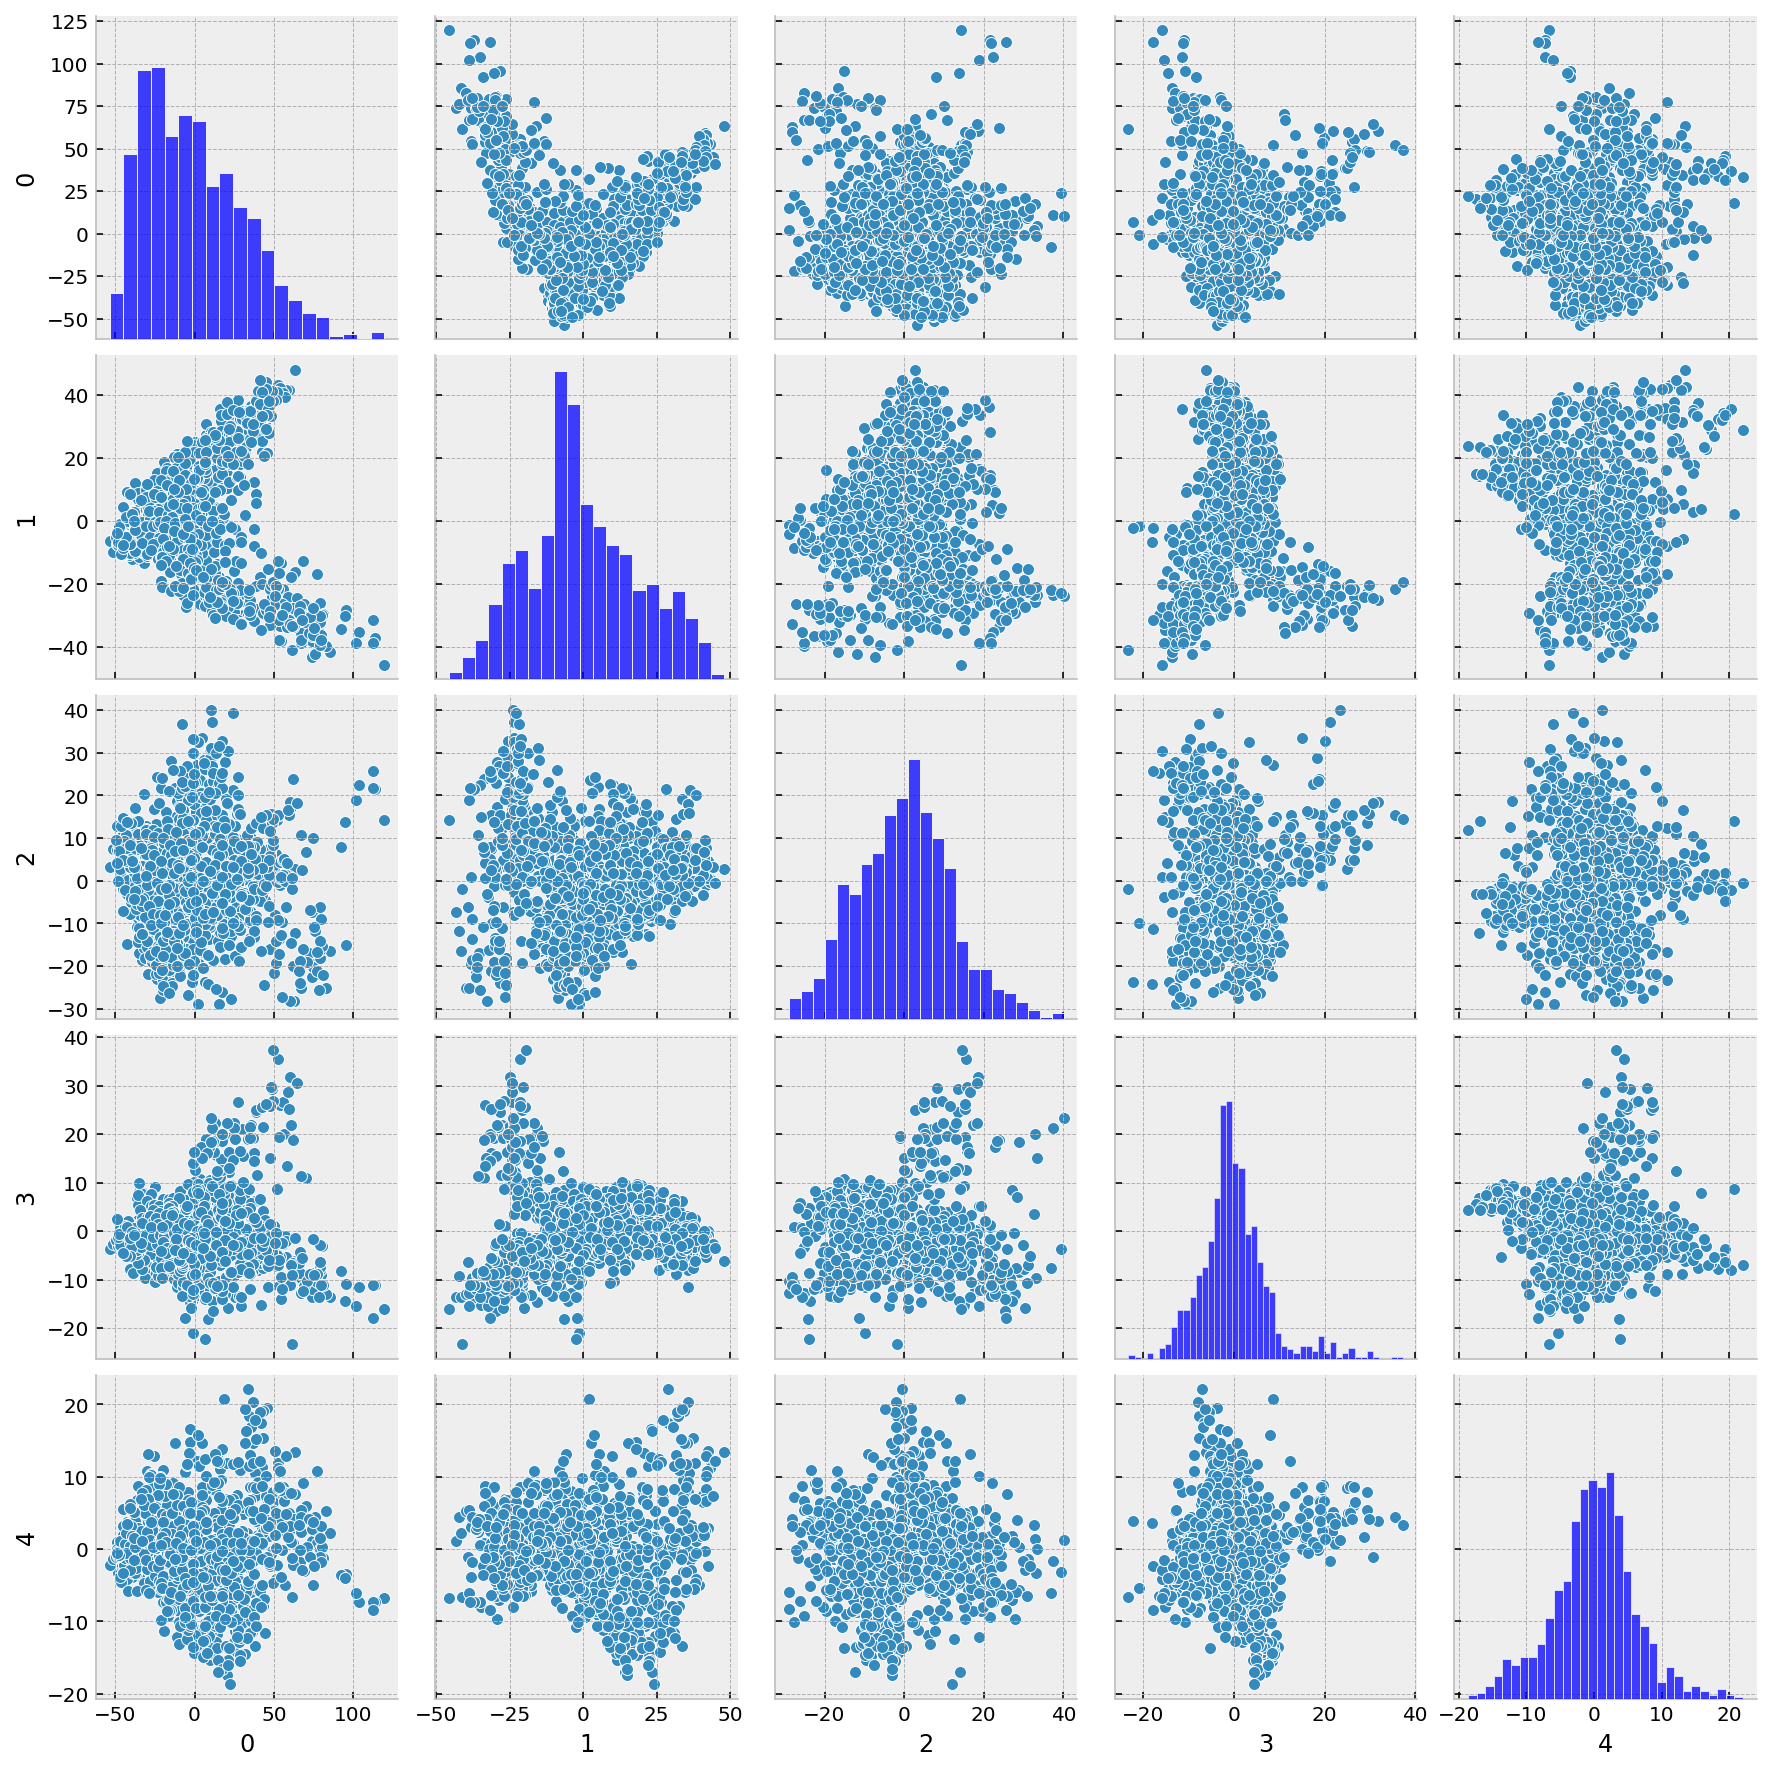

In [105]:
import seaborn as sns

df = pd.DataFrame(bzip.dist_proj)
sns.pairplot(df)

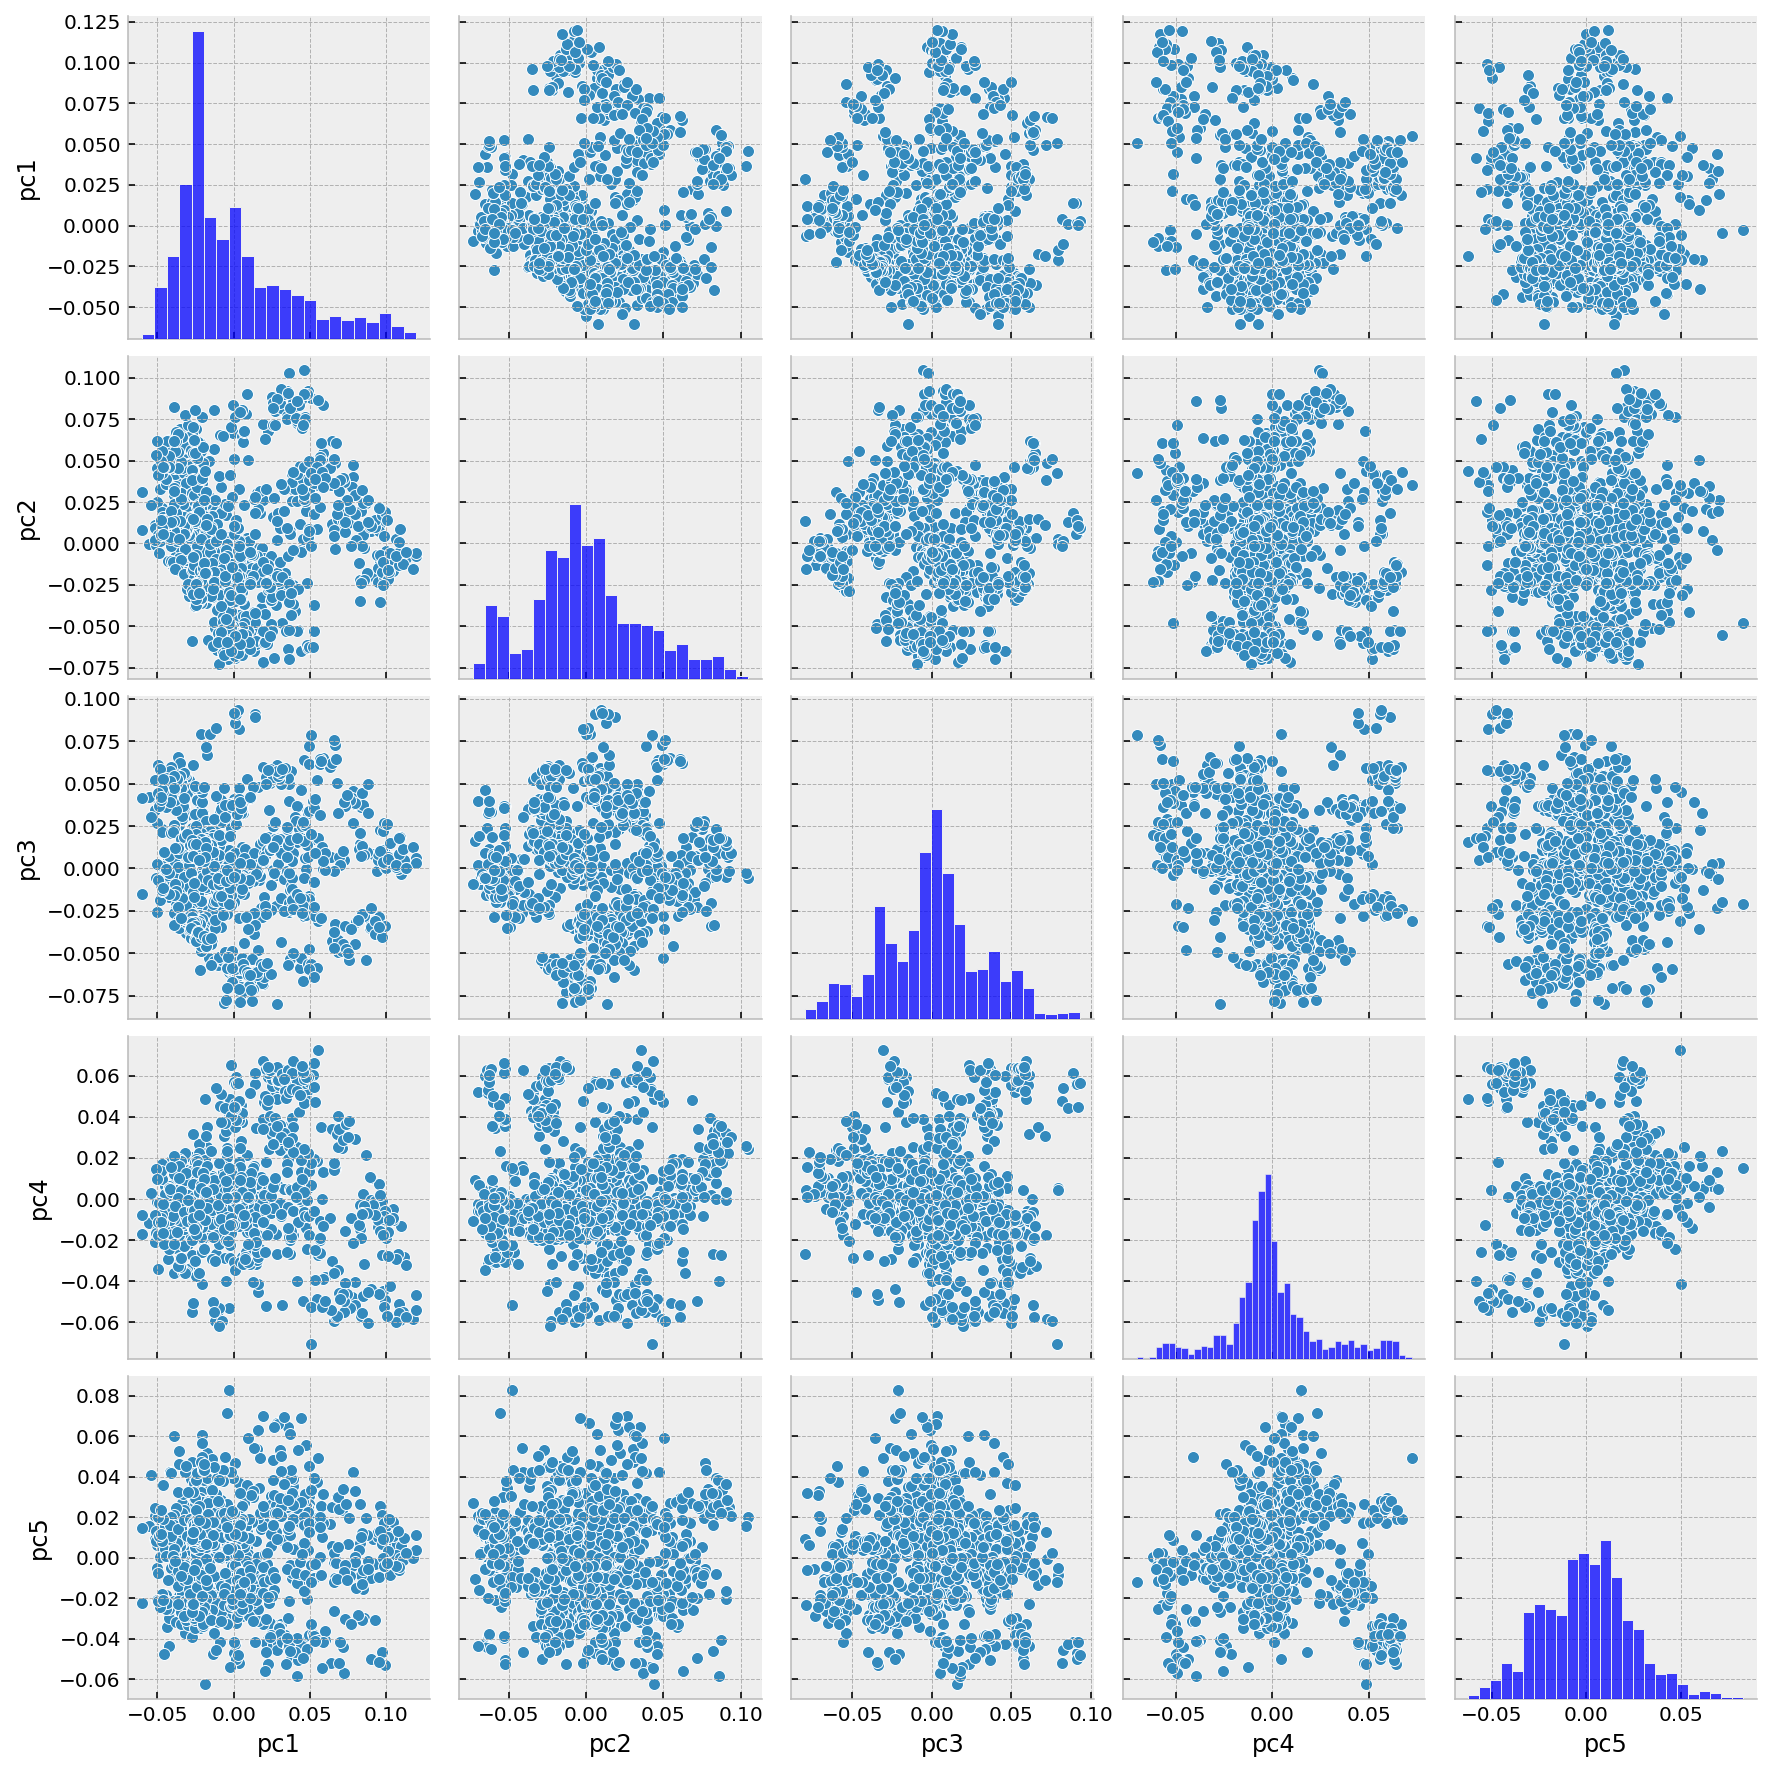

In [108]:
sns.pairplot(bzip.dpca_df)